In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

/home/anthony/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data = pd.read_csv('Phishing Data - Phishing Data.csv')

In [3]:
data.head(3)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1


In [4]:
data.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [10]:
y_classes = data['Result'].value_counts()

In [11]:
y_classes

0    1362
1    1094
Name: Result, dtype: int64

In [12]:
#### splitng independent and dependent variables

In [18]:
independent = data.drop('Result',axis=1)

In [20]:
dependent = data['Result']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.25, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

In [ ]:
#logistic regression

In [27]:
logistic =LogisticRegression()
model_1=logistic.fit(X_train,y_train)
y_log_pred=model_1.predict(X_test)

In [29]:
print("accuracy",accuracy_score(y_test,y_log_pred)*100)
print("validation accuracy",logistic.score(X_val,y_val) * 100 )

accuracy 92.50814332247556
validation accuracy 94.2133815551537


In [30]:
# support vector classifier

In [31]:
svc = SVC(kernel='rbf')
model_2 = svc.fit(X_train,y_train)
y_svc_pred = model_2.predict(X_test)

In [33]:
print("accuracy",accuracy_score(y_test,y_svc_pred)*100)
print("validation accuracy",svc.score(X_val,y_val) * 100 )

accuracy 92.83387622149837
validation accuracy 95.66003616636529


In [ ]:
# random forest

In [46]:
rf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
model_3 = rf.fit(X_train, y_train)
y_rf_pred = model_3.predict(X_test)
val_rf= round(rf.score(X_val, y_val) * 100, 2)
print("validation accuracy",val_rf)
print(metrics.confusion_matrix(y_test,y_pred_rf))

validation accuracy 95.48
[[330  16]
 [ 23 245]]


In [43]:
# Xgboost

In [48]:
xgb = XGBClassifier(n_estimators=500, learning_rate=0.02)
model_4 = xgb.fit(X_train, y_train)
y_xg_pred = model_4.predict(X_test)
val_xgb = round(model_4.score(X_val, y_val) * 100, 2)
print("validation accuracy",val_xgb)
print(metrics.confusion_matrix(y_test,y_xg_pred))

validation accuracy 95.84
[[322  24]
 [ 11 257]]


/home/anthony/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anthony/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [49]:
# visualisation

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


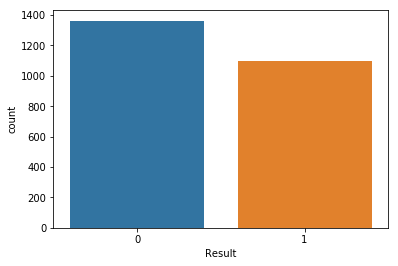

In [55]:
sns.countplot(x='Result',data=data)